In [134]:
#mondoDB returns the elements in double, so we use this function to remove the doubles
def Unify(dict_):
    return {v['id']:v for v in dict_}.values()



http://docs.mongodb.org/getting-started/python/query/

# Exercise 5.1

 To get started, clone this repository into your working directory. Start a running instance of MongoDB* (on command-line: mongod), then run the .sh file in a terminal. This should create a live Mongo database named ‘Northwind’ that you can connect to in Python. Document the connection by making some simple queries.

In [182]:
import pymongo
import pandas as pd
import os
import pandas as pd
os.system('mongod')

25600

In [82]:
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('localhost', 27017)

In [83]:
db = client.Northwind
names = db.collection_names(include_system_collections=False)
for n in names:
    print n

categories
customers
employee-territories
order-details
orders
products
regions
shippers
suppliers
territories


In [92]:
print type(db.customers.find({"CustomerID": 'ALFKI'}))
print
for c in list(db.customers.find({"CustomerID": 'ALFKI'})):
    print c
    print


<class 'pymongo.cursor.Cursor'>

{u'City': u'Berlin', u'ContactTitle': u'Sales Representative', u'CompanyName': u'Alfreds Futterkiste', u'Country': u'Germany', u'Region': u'NULL', u'Fax': u'030-0076545', u'Phone': u'030-0074321', u'ContactName': u'Maria Anders', u'Address': u'Obere Str. 57', u'PostalCode': 12209, u'_id': ObjectId('560adf1eb6e4bb5b6ccda25b'), u'CustomerID': u'ALFKI'}

{u'City': u'Berlin', u'ContactTitle': u'Sales Representative', u'CompanyName': u'Alfreds Futterkiste', u'Country': u'Germany', u'Region': u'NULL', u'Fax': u'030-0076545', u'Phone': u'030-0074321', u'ContactName': u'Maria Anders', u'Address': u'Obere Str. 57', u'PostalCode': 12209, u'_id': ObjectId('560adfc1b6e4bb5b6ccdaf3e'), u'CustomerID': u'ALFKI'}



# Exercise 5.2 ok

The customer with customerID ALFKI has made a number of orders containing some products. Query for, and return, all orders made by ALFKI and the products they contain.

In [98]:
user_orders = db.orders.find({"CustomerID": 'ALFKI'}).distinct("OrderID")

print user_orders
orders = []
for o in user_orders:
    o_dict = {"orderID" : o}
    products_ordered = []
    for detail in db["order-details"].find( { "OrderID": o}):
        d = detail["ProductID"] 
        if d not in products_ordered:
            products_ordered.append( d )
    o_dict["prods"] = products_ordered
    orders.append(o_dict)
        
print(" - - - - ")
print "number of orders: %s" %len(orders)
print(" - - - - ")
for o in orders:
    print " order : %s" %o["orderID"] 
    prods = o["prods"]
    for p in prods:
        print "\t *id prod: " + str(p) + " \t |  "+ db.products.find_one({"ProductID" : p})["ProductName"]
    

[10643, 10692, 10702, 10835, 10952, 11011]
 - - - - 
number of orders: 6
 - - - - 
 order : 10643
	 *id prod: 28 	 |  Rössle Sauerkraut
	 *id prod: 39 	 |  Chartreuse verte
	 *id prod: 46 	 |  Spegesild
 order : 10692
	 *id prod: 63 	 |  Vegie-spread
 order : 10702
	 *id prod: 3 	 |  Aniseed Syrup
	 *id prod: 76 	 |  Lakkalikööri
 order : 10835
	 *id prod: 59 	 |  Raclette Courdavault
	 *id prod: 77 	 |  Original Frankfurter grüne Soße
 order : 10952
	 *id prod: 6 	 |  Grandma's Boysenberry Spread
	 *id prod: 28 	 |  Rössle Sauerkraut
 order : 11011
	 *id prod: 58 	 |  Escargots de Bourgogne
	 *id prod: 71 	 |  Flotemysost


# Exercise 5.3: ok

Get all orders (with products) made by ALFKI that contain at least 2 product types.

In [100]:
#orders is defined above
for o in orders:
    prods = o["prods"]
    if len(prods) > 1:
        print " order : %s" %o["orderID"] 
        for p in prods:
            print "\t" + str(p) + " \t |  "+ db.products.find_one({"ProductID" : p})["ProductName"]

 order : 10643
	28 	 |  Rössle Sauerkraut
	39 	 |  Chartreuse verte
	46 	 |  Spegesild
 order : 10702
	3 	 |  Aniseed Syrup
	76 	 |  Lakkalikööri
 order : 10835
	59 	 |  Raclette Courdavault
	77 	 |  Original Frankfurter grüne Soße
 order : 10952
	6 	 |  Grandma's Boysenberry Spread
	28 	 |  Rössle Sauerkraut
 order : 11011
	58 	 |  Escargots de Bourgogne
	71 	 |  Flotemysost


# Exercise 5.4:

Determine how many and who ordered “Uncle Bob’s Organic Dried Pears” (productID 7).

In [112]:
uncleOrders = db["order-details"].find( { "ProductID": 7}).distinct("OrderID")

hippies = []
for u in uncleOrders:
    o = db.orders.find_one({ "OrderID": u})
    hippies.append(o["CustomerID"])

print
hippies = set(hippies)
print "%s hippies bought Uncle Bob’s Organic Dried Pears" % len(hippies)
for h in hippies:
    print h


20 hippies bought Uncle Bob’s Organic Dried Pears
GOURL
VAFFE
BOTTM
FOLKO
BSBEV
EASTC
FOLIG
ERNSH
BONAP
SANTG
REGGC
OTTIK
RATTC
VICTE
LILAS
QUICK
SAVEA
OCEAN
SPLIR
LACOR


# Exercise 5.5: ok

How many different and which products have been ordered by customers who have also ordered “Uncle Bob’s Organic Dried Pears”?

In [135]:
hippiesproducts = set()

for h in hippies:
    orders = db.orders.find({ "CustomerID": h})
    for o in orders:
        details = db["order-details"].find({"OrderID" : o["OrderID"]}).distinct("ProductID")
        for d in details:
            hippiesproducts.add(d)


print "hippies oredered also %s kind of different products" %len(hippiesproducts)
print
for p in hippiesproducts:
    print str(p) + "\t | " + db.products.find_one({"ProductID" : p})["ProductName"]

hippies oredered also 76 kind of different products

1	 | Chai
2	 | Chang
3	 | Aniseed Syrup
4	 | Chef Anton's Cajun Seasoning
5	 | Chef Anton's Gumbo Mix
6	 | Grandma's Boysenberry Spread
7	 | Uncle Bob's Organic Dried Pears
8	 | Northwoods Cranberry Sauce
9	 | Mishi Kobe Niku
10	 | Ikura
11	 | Queso Cabrales
12	 | Queso Manchego La Pastora
13	 | Konbu
14	 | Tofu
15	 | Genen Shouyu
16	 | Pavlova
17	 | Alice Mutton
18	 | Carnarvon Tigers
19	 | Teatime Chocolate Biscuits
20	 | Sir Rodney's Marmalade
21	 | Sir Rodney's Scones
22	 | Gustaf's Knäckebröd
23	 | Tunnbröd
24	 | Guaraná Fantástica
25	 | NuNuCa Nuß-Nougat-Creme
26	 | Gumbär Gummibärchen
27	 | Schoggi Schokolade
28	 | Rössle Sauerkraut
29	 | Thüringer Rostbratwurst
30	 | Nord-Ost Matjeshering
31	 | Gorgonzola Telino
32	 | Mascarpone Fabioli
33	 | Geitost
34	 | Sasquatch Ale
35	 | Steeleye Stout
36	 | Inlagd Sill
37	 | Gravad lax
38	 | Côte de Blaye
39	 | Chartreuse verte
40	 | Boston Crab Meat
41	 | Jack's New England Clam Chowde

# Exercise 5.6:

Of those products ordered by customers who have also ordered “Uncle Bob’s Organic Dried Pears”, which one has been ordered the most (by the same set of customers).

In [127]:
hippiesproducts = {}
import operator

for h in hippies:
    orders = db.orders.find({ "CustomerID": h}).distinct("OrderID")
    for o in orders:
        details = db["order-details"].find({"OrderID" : o})
        for d in details:
            p_id = d["ProductID"]
            q = 1 #d["Quantity"] #we count orders
            if p_id in hippiesproducts:
                hippiesproducts[p_id] += q
            else:
                hippiesproducts[p_id] = q



print "hippies oredered also %s kind of different products" %len(hippiesproducts)
print
for p in sorted(hippiesproducts.items() , key = operator.itemgetter(1) , reverse = True )[:10]:
    print "id: " + str(p[0]) + "\t | qty: "+ str(p[1]) + "\t | " + " name: " + db.products.find_one({"ProductID" : p[0]})["ProductName"]

hippies oredered also 76 kind of different products

id: 7	 | qty: 58	 |  name: Uncle Bob's Organic Dried Pears
id: 41	 | qty: 44	 |  name: Jack's New England Clam Chowder
id: 62	 | qty: 44	 |  name: Tarte au sucre
id: 59	 | qty: 38	 |  name: Raclette Courdavault
id: 60	 | qty: 38	 |  name: Camembert Pierrot
id: 2	 | qty: 36	 |  name: Chang
id: 56	 | qty: 36	 |  name: Gnocchi di nonna Alice
id: 31	 | qty: 34	 |  name: Gorgonzola Telino
id: 75	 | qty: 34	 |  name: Rhönbräu Klosterbier
id: 10	 | qty: 32	 |  name: Ikura


In [146]:
product_set = set()
product_list = list()

for h in set(hippies):
    orders = db.orders.find({ "CustomerID": h}).distinct("OrderID")
    for o in orders:
        details = db["order-details"].find({"OrderID" : o}).distinct('ProductID')
        for p in details:
            product_set.add(p)
            product_list.append(p)

product_set = list(product_set)
results = pd.DataFrame( { "ProductID" : product_set, "TimesOrdered" : [product_list.count(p) for p in product_set], "ProductName" :[db.products.find_one({"ProductID" : p})["ProductName"] for p in product_set] })
print "number of different products: %s" %len(results)

print "TOP 10 ordered products for this set of customers"
results.sort( columns = "TimesOrdered" , ascending = False)[:10]

number of different products: 76
TOP 10 ordered products for this set of customers


,ProductID,ProductName,TimesOrdered
6,7,Uncle Bob's Organic Dried Pears,29
40,41,Jack's New England Clam Chowder,22
61,62,Tarte au sucre,22
59,60,Camembert Pierrot,19
58,59,Raclette Courdavault,19
1,2,Chang,18
55,56,Gnocchi di nonna Alice,18
30,31,Gorgonzola Telino,17
73,75,Rhönbräu Klosterbier,17
16,17,Alice Mutton,16


# Exercise 5.7:

The customer with customerID ALFKI has bought a series of products. Determine which other customers have bought most of the same products.

In [181]:
# get the set of products ordered by ALFKI
ALFKI_orders = db.orders.find({"CustomerID": 'ALFKI'}).distinct("OrderID")
ALFKI_Products = set()

for o in ALFKI_orders:
    ALFKI_Products |= set( db["order-details"].find( { "OrderID": o}).distinct("ProductID"))

# get all orders ids 
all_orders_ids = set(db.orders.find().distinct("OrderID"))

#match all customers who have ordered at least one products in this set of product
customers_matched_orders = set()
for o in all_orders_ids:
    products = set( db["order-details"].find( { "OrderID": o}).distinct("ProductID"))
    if (ALFKI_Products.intersection(products)): #if intersection != null
        customers_matched_orders.add( db.orders.find_one({"OrderID" : o})["CustomerID"])
        
customers_matched_orders = list(customers_matched_orders) #convert for the dataframe

# count the number of common products
customers_matched_products_counts = list()
for c in customers_matched_orders:
    # for each customer, get the set of ordered products
    orders = set( db.orders.find( { "CustomerID": c}).distinct("OrderID"))
    products = set()
    for o in orders:
        products |= set( db["order-details"].find( { "OrderID": o}).distinct("ProductID"))
    customers_matched_products_counts.append( len( ALFKI_Products.intersection(products) ) )

#group the results and order

results = pd.DataFrame({ "customerID": customers_matched_orders, "NumberOfCommonsProducts": customers_matched_products_counts})
print "%s customers bought at least one common product" %len(results)
print "TOP 30 customers with common products"
results.sort( columns = "NumberOfCommonsProducts" , ascending = False)[:30]


76 customers bought at least one common product
TOP 30 customers with common products


,NumberOfCommonsProducts,customerID
61,11,ALFKI
9,9,RATTC
30,8,HUNGO
11,7,QUICK
2,7,FOLKO
33,7,VAFFE
70,7,SAVEA
63,7,HILAA
13,7,ERNSH
46,7,BERGS


# some personal tests

In [78]:
from lightning import Lightning

from numpy import random, asarray


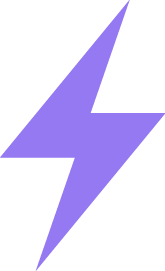

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [79]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [80]:
connections = random.rand(50,50)
connections[connections<0.98] = 0

lgn.enable_ipython()

group1 = (random.rand(50) * 3).astype('int')
group2 = (random.rand(50) * 4).astype('int')
viz = lgn.circle(connections, labels=['group ' + str(x) for x in group2], group=[group1, group2])

from IPython.display import IFrame
IFrame(viz.get_public_link().replace('http','https') , width=700, height=300) 

<IPython.core.display.Javascript object>

In [12]:
import networkx as nx


In [13]:

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

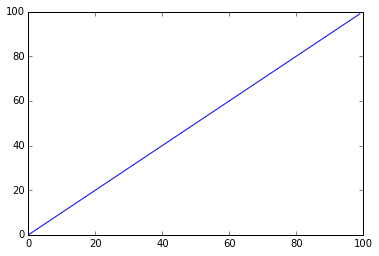

In [14]:
x = range(0,100)

plt.plot(x)

In [15]:
import networkx as nx
from IPython.display import display, HTML
G = nx.random_regular_graph(3,10)
mat = asarray(nx.adjacency_matrix(G).todense())
graph = lgn.force(mat).get_html()
display(HTML(graph))

<class 'IPython.core.display.HTML'>
